--------------------------------------------------------------
# Apply Machine Learning Algorithms :


 #### 1) Logistic Regression
 #### 2) Decision Tree Classifier
 #### 3) Random Forest Classifier
 #### 4) Adaboost Classifier
 #### 5) XGBoost Classifier

--------------------------------------------------------------
### In this file, we normalize the feature data.

In [33]:
# Importing libraries and packages:

from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import preprocessing

# Importing the required packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from pickle import dump, load
from keras.utils import np_utils

%matplotlib inline

In [34]:
# Collect data
pickle_dir = 'TFS_Dataset/Pickle/'

In [35]:
# Number of total classes
NUM_CATEGORIES = 43


# Resizing the images to 32x32x3
img_height = 32
img_width = 32
channels = 3

# reshape image size
n_features = 1024  ## 32 * 32 = 1024

## Load Pickle file data


In [36]:
# Load all Training images & label data
fid = open((pickle_dir+'X_train_y_train_gray.pkl'), 'rb')
X_train_gray,y_train_gray = load(fid)
fid.close()

# Load all Testing images & label data
fid = open((pickle_dir+'X_test_y_test_gray.pkl'), 'rb')
X_test_gray,y_test_gray = load(fid)
fid.close()

# Load Traffic sign Classes
fid = open((pickle_dir+'Traffic_sign_Classes.pkl'), 'rb')
traffic_classes = load(fid)
fid.close()

## Summary

In [37]:
print("Number of Training examples =", len(X_train_gray))
print("Number of Testing examples =", len(X_test_gray))
print("Image data shape =", (X_train_gray.shape))
print("Number of classes =", len(traffic_classes))

Number of Training examples = 39209
Number of Testing examples = 12630
Image data shape = (39209, 32, 32)
Number of classes = 43


## Reshape training, testing and validation data


In [38]:
print("X_train_gray shape before reshape : ",X_train_gray.shape)
print("X_test_gray shape before reshape: ",X_test_gray.shape)

X_train_gray shape before reshape :  (39209, 32, 32)
X_test_gray shape before reshape:  (12630, 32, 32)


In [39]:
# building the input vector from the 32x32 pixels
X_train_gray = X_train_gray.reshape(X_train_gray.shape[0], n_features)
X_test_gray = X_test_gray.reshape(X_test_gray.shape[0], n_features)

In [40]:
print("X_train_gray shape after reshape : ",X_train_gray.shape)
print("X_test_gray shape after reshape: ",X_test_gray.shape)


X_train_gray shape after reshape :  (39209, 1024)
X_test_gray shape after reshape:  (12630, 1024)


In [41]:
X_train_gray

array([[ 43,  51,  48, ...,  46,  59,  52],
       [119, 155, 208, ..., 179, 175, 197],
       [123, 176, 160, ...,  38,  39,  39],
       ...,
       [255, 255, 252, ..., 226, 221, 222],
       [109, 128, 202, ...,  46,  49,  46],
       [174, 204, 203, ..., 105, 101, 100]], dtype=uint8)

## Standardize the data

In [42]:
X_train_gray = preprocessing.scale(X_train_gray)
X_test_gray = preprocessing.scale(X_test_gray)

In [43]:
X_train_gray

array([[-0.59255351, -0.48713397, -0.52921723, ..., -0.35216126,
        -0.1412604 , -0.24908881],
       [ 0.40507732,  0.87800471,  1.57016444, ...,  1.73709442,
         1.69009929,  2.02650958],
       [ 0.4575842 ,  1.15365771,  0.94034994, ..., -0.47783077,
        -0.45701207, -0.45310797],
       ...,
       [ 2.19031143,  2.19063805,  2.1474944 , ...,  2.47540282,
         2.41632813,  2.41885413],
       [ 0.2738101 ,  0.5235937 ,  1.49143763, ..., -0.35216126,
        -0.29913623, -0.3432515 ],
       [ 1.12704699,  1.52119505,  1.50455876, ...,  0.57465141,
         0.52181811,  0.50421273]])

In [44]:
print("y_train :",y_train_gray.shape)
print("y_test :",y_test_gray.shape)

y_train : (39209,)
y_test : (12630,)


# 1 - Logistic Regression

In [46]:
# import Logistic Regression 
from sklearn.linear_model import LogisticRegression

my_logreg = LogisticRegression()
my_logreg.fit(X_train_gray, y_train_gray)

# Prediction on the testing set:
y_predict_lr = my_logreg.predict(X_test_gray)
print(y_predict_lr)

[12 13  1 ...  5  1 38]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Accuracy Evaluation:


In [47]:
# display accuracy
score_lr = accuracy_score(y_test_gray, y_predict_lr)

print("Logistic Regression  accuracy: ",score_lr)


Logistic Regression  accuracy:  0.8180522565320665


### Estimating the Probability (likelihood) of happening an Event: 

In [15]:
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_lr = my_logreg.predict_proba(X_test_gray)

print(y_predict_lr)
print(y_predict_prob_lr[:,1])


[12 13  1 ...  5  1 38]
[6.55040160e-04 2.81843956e-07 9.81136129e-01 ... 2.12442329e-01
 9.99804176e-01 4.13760022e-14]


### True Positive Rate (TPR) and False Positive Rate (FPR):

In [16]:
fpr_lr, tpr_lr, thresholds = metrics.roc_curve(y_test_gray, y_predict_prob_lr[:,1], pos_label=1)

print(fpr_lr)
print(tpr_lr)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.67926113e-04
 1.67926113e-04 2.51889169e-04 2.51889169e-04 3.35852225e-04
 3.35852225e-04 4.19815281e-04 4.19815281e-04 5.03778338e-04
 5.03778338e-04 5.87741394e-04 5.87741394e-04 6.71704450e-04
 6.71704450e-04 7.55667506e-04 7.55667506e-04 8.39630563e-04
 8.39630563e-04 9.23593619e-04 9.23593619e-04 1.00755668e-03
 1.00755668e-03 1.25944584e-03 1.25944584e-03 1.34340890e-03
 1.34340890e-03 1.42737196e-03 1.42737196e-03 1.59529807e-03
 1.59529807e-03 1.67926113e-03 1.67926113e-03 1.76322418e-03
 1.76322418e-03 2.01511335e-03 2.01511335e-03 2.09907641e-03
 2.09907641e-03 2.18303946e-03 2.18303946e-03 2.26700252e-03
 2.26700252e-03 2.35096558e-03 2.35096558e-03 2.43492863e-03
 2.43492863e-03 2.51889169e-03 2.51889169e-03 2.60285474e-03
 2.60285474e-03 2.68681780e-03 2.68681780e-03 2.77078086e-03
 2.77078086e-03 2.93870697e-03 2.93870697e-03 3.02267003e-03
 3.02267003e-03 3.19059614e-03 3.19059614e-03 3.27455919e-03
 3.27455919e-03 3.358522

### AUC:

In [17]:
# AUC:
AUC_lr = metrics.auc(fpr_lr, tpr_lr)
print(AUC_lr)

0.9780864586248718


### ROC Curve:

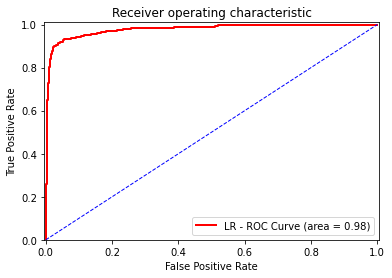

In [18]:
plt.figure()

# Roc Curve:
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label='LR - ROC Curve (area = %0.2f)' % AUC_lr)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# 2 - Decision Tree Classifier


In [19]:
%%time
# import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

my_decisiontree = DecisionTreeClassifier(random_state=2)
my_decisiontree.fit(X_train_gray, y_train_gray)

# Prediction on the testing set:
y_predict_dt = my_decisiontree.predict(X_test_gray)

print(y_predict_dt)

[12  3  1 ...  5  1 38]
CPU times: user 41.7 s, sys: 160 ms, total: 41.9 s
Wall time: 42.2 s


In [20]:
# display accuracy
score_dt = accuracy_score(y_test_gray, y_predict_dt)

print("Decision Tree Classifier accuracy: ",score_dt)

Decision Tree Classifier accuracy:  0.5572446555819477


### Estimating the Probability (likelihood) of happening an Event: 


In [21]:
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_dt = my_decisiontree.predict_proba(X_test_gray)

print(y_predict_dt)
print(y_predict_prob_dt[:,1])

[12  3  1 ...  5  1 38]
[0. 0. 1. ... 0. 1. 0.]


### True Positive Rate (TPR) and False Positive Rate (FPR):

In [22]:
fpr_dt, tpr_dt, thresholds_dt = metrics.roc_curve(y_test_gray, y_predict_prob_dt[:,1], pos_label=1)

print(fpr_dt)
print("\n")
print(tpr_dt)

[0.         0.02308984 1.        ]


[0.         0.58472222 1.        ]


### AUC:

In [23]:
# AUC:
AUC_dt = metrics.auc(fpr_dt, tpr_dt)
print(AUC_dt)

0.7808161908760145


### ROC Curve:

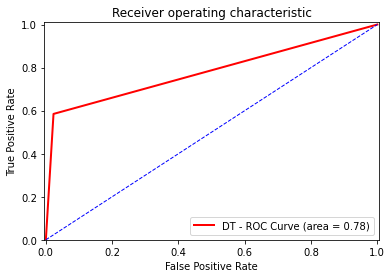

In [24]:
plt.figure()

# Roc Curve:
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label='DT - ROC Curve (area = %0.2f)' % AUC_dt)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# 3 - Random Forest Classifier

In [25]:
%%time
# import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

my_RandomForest = RandomForestClassifier(n_estimators = 29, bootstrap = True, random_state=2)
my_RandomForest.fit(X_train_gray, y_train_gray)

# Prediction on the testing set:
y_predict_rf = my_RandomForest.predict(X_test_gray)

print(y_predict_rf)

[12 34  1 ...  1  1 12]
CPU times: user 27.7 s, sys: 221 ms, total: 27.9 s
Wall time: 28.1 s


In [26]:
# display accuracy
score_rf = accuracy_score(y_test_gray, y_predict_rf)

print("Random Forest Classifier accuracy: ",score_rf)

Random Forest Classifier accuracy:  0.7256532066508313


### Estimating the Probability (likelihood) of happening an Event: 


In [27]:
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_rf = my_RandomForest.predict_proba(X_test_gray)

print(y_predict_rf)
print(y_predict_prob_rf[:,1])

[12 34  1 ...  1  1 12]
[0.03448276 0.06896552 0.37931034 ... 0.37931034 0.31034483 0.03448276]


### True Positive Rate (TPR) and False Positive Rate (FPR):

In [28]:

fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test_gray, y_predict_prob_rf[:,1], pos_label=1)

print(fpr_rf)
print("\n")
print(tpr_rf)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.39630563e-05 3.35852225e-04
 6.71704450e-04 1.17548279e-03 2.35096558e-03 4.86985726e-03
 8.48026868e-03 1.62048699e-02 2.76238455e-02 4.83627204e-02
 7.99328296e-02 1.39714526e-01 2.54240134e-01 4.76574307e-01
 1.00000000e+00]


[0.         0.00138889 0.02083333 0.03333333 0.04166667 0.05555556
 0.08055556 0.1        0.12222222 0.14722222 0.18472222 0.21944444
 0.27083333 0.33611111 0.39861111 0.44583333 0.50694444 0.57361111
 0.6375     0.68472222 0.72916667 0.77638889 0.84444444 0.87638889
 0.90555556 0.93611111 0.96944444 0.98611111 1.        ]


### AUC:

In [29]:
# AUC:
AUC_rf = metrics.auc(fpr_rf, tpr_rf)
print(AUC_rf)

0.9678906614422987


### ROC Curve:

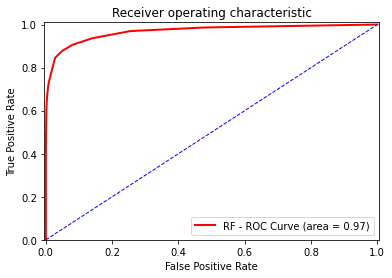

In [30]:
plt.figure()

# Roc Curve:
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label='RF - ROC Curve (area = %0.2f)' % AUC_rf)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# 4 - Adaboost Classifier


In [31]:
%%time
# import Ada Boost Classifier
from sklearn.ensemble import AdaBoostClassifier

my_AdaBoost = AdaBoostClassifier(n_estimators = 29,random_state=2)
my_AdaBoost.fit(X_train_gray,y_train_gray)

# Prediction on the testing set:
y_predict_ad = my_AdaBoost.predict(X_test_gray)

print(y_predict_ad)

[12 14  2 ... 14 38 14]
CPU times: user 1min 11s, sys: 3.26 s, total: 1min 14s
Wall time: 1min 14s


In [32]:
# display accuracy
score_ad = accuracy_score(y_test_gray, y_predict_ad)

print("AdaBoost Classifier accuracy: ",score_ad)

AdaBoost Classifier accuracy:  0.21211401425178147


### Estimating the Probability (likelihood) of happening an Event: 


In [33]:
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_ad = my_AdaBoost.predict_proba(X_test_gray)

print(y_predict_ad)
print(y_predict_prob_ad[:,1])

[12 14  2 ... 14 38 14]
[0.02609871 0.03845122 0.02706622 ... 0.03140738 0.02625194 0.03669593]


### True Positive Rate (TPR) and False Positive Rate (FPR):

In [34]:
fpr_ad, tpr_ad, thresholds_ad = metrics.roc_curve(y_test_gray, y_predict_prob_ad[:,1], pos_label=1)

print(fpr_ad)
print("\n")
print(tpr_ad)

[0.         0.         0.         ... 0.99941226 0.99983207 1.        ]


[0.         0.00416667 0.00694444 ... 1.         1.         1.        ]


### AUC:

In [35]:
# AUC:
AUC_ad = metrics.auc(fpr_ad, tpr_ad)
print(AUC_ad)

0.7094879419721989


### ROC Curve:

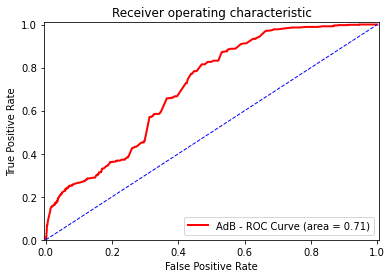

In [36]:
plt.figure()

# Roc Curve:
plt.plot(fpr_ad, tpr_ad, color='red', lw=2, label='AdB - ROC Curve (area = %0.2f)' % AUC_ad)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# 5 - XGBoost Classifier


In [48]:
%%time
# import XGBoost Classifier
from xgboost import XGBClassifier

my_XGBoost = XGBClassifier(n_estimators = 29,random_state=2)
my_XGBoost.fit(X_train_gray,y_train_gray)

# Prediction on the testing set:
y_predict_xg = my_XGBoost.predict(X_test_gray)

print(y_predict_xg)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:40:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12 18  1 ...  1  1 18]
CPU times: user 1h 28min 13s, sys: 34.8 s, total: 1h 28min 48s
Wall time: 12min 44s


In [49]:
# display accuracy
score_xg = accuracy_score(y_test_gray, y_predict_xg)

print("XGBoost Classifier accuracy: ",score_xg)

XGBoost Classifier accuracy:  0.7389548693586698


### Estimating the Probability (likelihood) of happening an Event: 


In [39]:
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_xg = my_XGBoost.predict_proba(X_test_gray)

print(y_predict_xg)
print(y_predict_prob_xg[:,1])

[12 18  1 ...  1  1 18]
[0.05524035 0.22837232 0.9990958  ... 0.9502478  0.9685923  0.04130529]


### True Positive Rate (TPR) and False Positive Rate (FPR):

In [40]:

fpr_xg, tpr_xg, thresholds_xg = metrics.roc_curve(y_test_gray, y_predict_prob_xg[:,1], pos_label=1)

print(fpr_xg)
print("\n")
print(tpr_xg)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 8.39630563e-05
 8.39630563e-05 1.67926113e-04 1.67926113e-04 2.51889169e-04
 2.51889169e-04 3.35852225e-04 3.35852225e-04 4.19815281e-04
 4.19815281e-04 5.03778338e-04 5.03778338e-04 5.87741394e-04
 5.87741394e-04 6.71704450e-04 6.71704450e-04 7.55667506e-04
 7.55667506e-04 9.23593619e-04 9.23593619e-04 1.09151973e-03
 1.09151973e-03 1.17548279e-03 1.17548279e-03 1.25944584e-03
 1.25944584e-03 1.42737196e-03 1.42737196e-03 1.51133501e-03
 1.51133501e-03 1.59529807e-03 1.59529807e-03 1.67926113e-03
 1.67926113e-03 1.76322418e-03 1.76322418e-03 1.93115029e-03
 1.93115029e-03 2.01511335e-03 2.01511335e-03 2.09907641e-03
 2.09907641e-03 2.18303946e-03 2.18303946e-03 2.26700252e-03
 2.26700252e-03 2.35096558e-03 2.35096558e-03 2.43492863e-03
 2.43492863e-03 2.51889169e-03 2.51889169e-03 2.93870697e-03
 2.93870697e-03 3.02267003e-03 3.02267003e-03 3.10663308e-03
 3.10663308e-03 3.35852225e-03 3.35852225e-03 3.44248531e-03
 3.44248531e-03 3.610411

### AUC:

In [41]:
# AUC:
AUC_xg = metrics.auc(fpr_xg, tpr_xg)
print(AUC_xg)

0.9799053083310011


### ROC Curve:

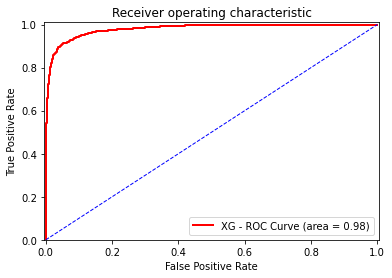

In [42]:
plt.figure()

# Roc Curve:
plt.plot(fpr_xg, tpr_xg, color='red', lw=2, label='XG - ROC Curve (area = %0.2f)' % AUC_xg)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

#  Comparing the ROC Curves:

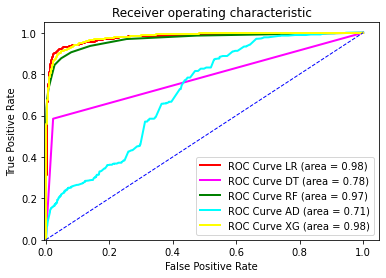

In [43]:
plt.figure()

# Roc Curve: Logistic Regression
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label='ROC Curve LR (area = %0.2f)' % AUC_lr)

# Roc Curve: Decision Tree Classifier
plt.plot(fpr_dt, tpr_dt, color='magenta', lw=2, label='ROC Curve DT (area = %0.2f)' % AUC_dt)

# Roc Curve: Random Forest Classifier
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='ROC Curve RF (area = %0.2f)' % AUC_rf)

# Roc Curve: Adaboost Classifier
plt.plot(fpr_ad, tpr_ad, color='cyan', lw=2, label='ROC Curve AD (area = %0.2f)' % AUC_ad)

# Roc Curve: XGBoost Classifier
plt.plot(fpr_xg, tpr_xg, color='yellow', lw=2, label='ROC Curve XG (area = %0.2f)' % AUC_xg)


# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.05])
plt.ylim([0.0, 1.05])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

#   
# Cross-Validation

## Combine training and testing data :


In [25]:
X_new = np.concatenate((X_train_gray, X_test_gray))
y_new = np.concatenate((y_train_gray, y_test_gray))

In [26]:
X_new

array([[-0.59255351, -0.48713397, -0.52921723, ..., -0.35216126,
        -0.1412604 , -0.24908881],
       [ 0.40507732,  0.87800471,  1.57016444, ...,  1.73709442,
         1.69009929,  2.02650958],
       [ 0.4575842 ,  1.15365771,  0.94034994, ..., -0.47783077,
        -0.45701207, -0.45310797],
       ...,
       [ 0.1932013 ,  0.01714963,  0.95272565, ...,  0.9497528 ,
         0.85798182,  0.17091457],
       [-0.49833476, -0.6322847 , -0.61976803, ..., -0.43242756,
        -0.43029419, -0.46146959],
       [-0.22714415, -0.05049978, -0.22664461, ..., -0.14970885,
         1.60300891,  2.05264308]])

In [27]:
y_new

array([ 6, 33, 17, ...,  4,  1, 38])

In [28]:
print("X:",X_new.shape)
print("y:",y_new.shape)

X: (51839, 1024)
y: (51839,)


### Applying 10-fold Cross Validation for "Decision Tree" classifier:


In [29]:
%%time

from sklearn.model_selection import cross_val_score

my_decisiontree = DecisionTreeClassifier(random_state=1)
accuracy_list = cross_val_score(my_decisiontree,X_new, y_new, cv=10, scoring='accuracy')

print('Cross-Validation Accuracy: ',accuracy_list,'\n')

Cross-Validation Accuracy:  [0.77527006 0.78472222 0.77430556 0.78279321 0.77719907 0.77488426
 0.77411265 0.77006173 0.75154321 0.73162261] 

CPU times: user 8min 52s, sys: 2.83 s, total: 8min 55s
Wall time: 8min 56s


In [30]:
# display accuracy
accuracy_cv = accuracy_list.mean()

print("Cross-Validation Accuracy for Decision Tree: ",accuracy_cv)

Cross-Validation Accuracy for Decision Tree:  0.7696514587695291


### Applying 10-fold Cross Validation for "Logistic Regression" classifier:


In [31]:
%%time

my_logreg_cv = LogisticRegression()
accuracy_list_cv_lr = cross_val_score(my_logreg_cv,X_new, y_new, cv=10, scoring='accuracy')

print('\n','Cross-Validation Accuracy: ',accuracy_list_cv_lr)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


 Cross-Validation Accuracy:  [0.9054784  0.91377315 0.90239198 0.91493056 0.9066358  0.90297068
 0.91087963 0.90354938 0.88618827 0.87999228]
CPU times: user 44min 19s, sys: 1min 56s, total: 46min 16s
Wall time: 4min 53s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
# display accuracy
accuracy_cv_lr = accuracy_list_cv_lr.mean()

print("Cross-Validation Accuracy for Logistic Regression: ",accuracy_cv)

Cross-Validation Accuracy for Logistic Regression:  0.7696514587695291
